📊 Données chargées : 26,154 observations, 12 pays
🌍 Pays : ['Cntry_1', 'Cntry_10', 'Cntry_11', 'Cntry_12', 'Cntry_13', 'Cntry_15', 'Cntry_19', 'Cntry_21', 'Cntry_5', 'Cntry_7', 'Cntry_8', 'Cntry_9']

🔍 Valeurs manquantes par variable :
Series([], dtype: int64)

📈 PHASE 1 : ANALYSE EN COMPOSANTES PRINCIPALES (PCA)

📊 Variance expliquée par composante :
  PC1: 17.42% (cumulé: 17.42%)
  PC2: 10.33% (cumulé: 27.75%)
  PC3: 8.35% (cumulé: 36.10%)
  PC4: 6.82% (cumulé: 42.91%)
  PC5: 6.36% (cumulé: 49.28%)

🔬 Loadings des 3 premières composantes :
                                   PC1    PC2    PC3
Laws_Based_Sharia                0.197  0.192  0.467
Religious_Self_Description       0.249  0.307  0.188
Trust_Religious_Leaders          0.394  0.002  0.246
Trust_Islamist_Party             0.356 -0.019  0.297
Men_Better_Political_Leadership  0.150  0.069  0.398
Violence_Against_Women_Change   -0.198  0.171 -0.015
Income_Covers_Expenses           0.034 -0.409  0.111
Future_Economic_Situation   

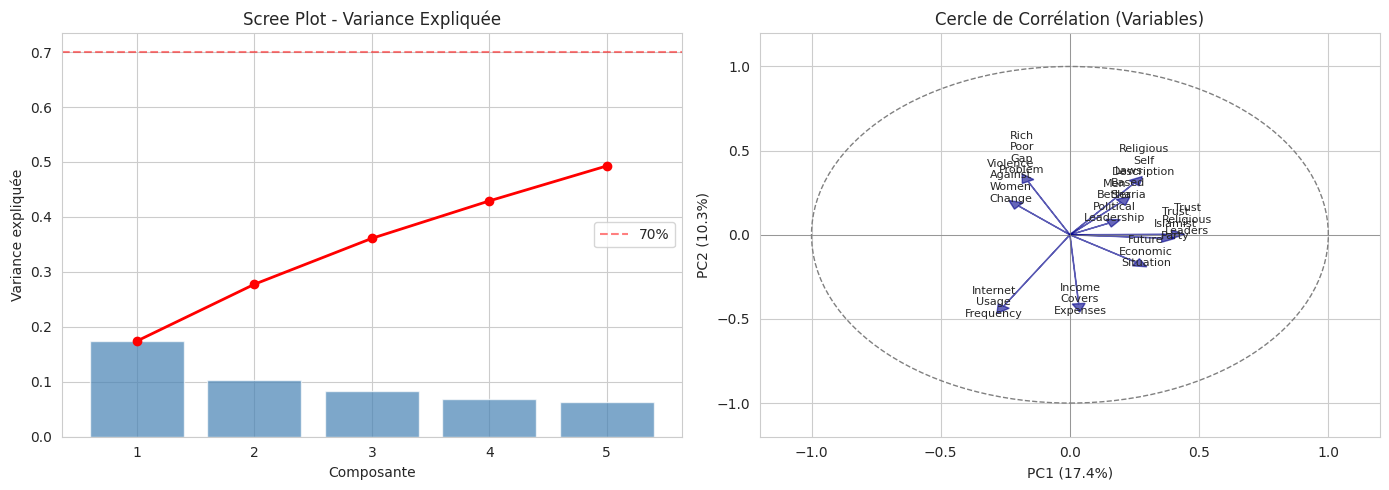


🎯 PHASE 2 : DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS


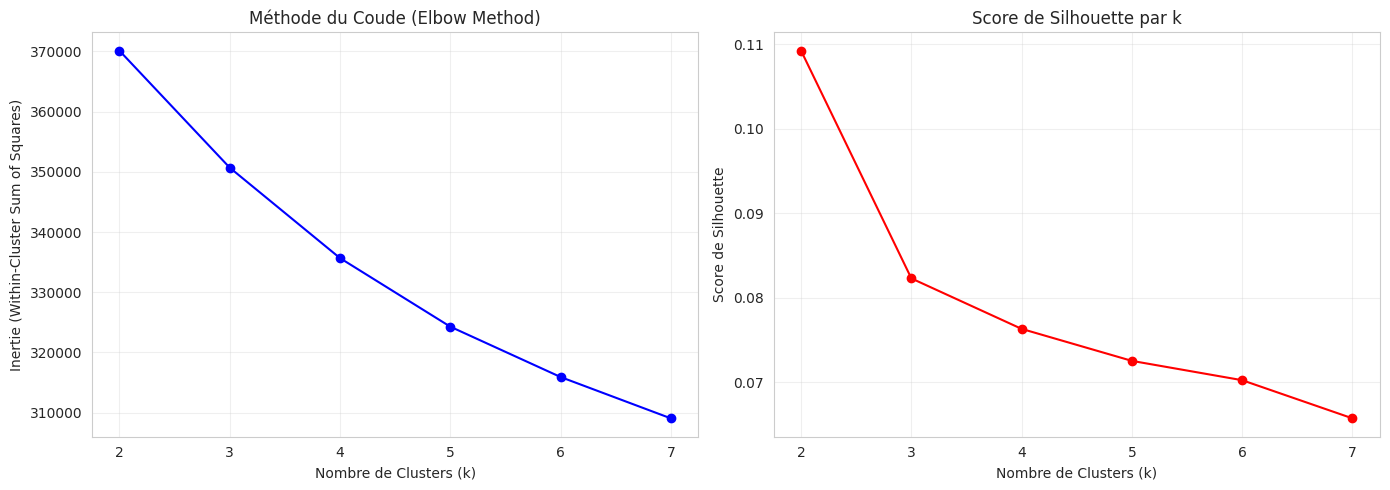


✅ Nombre optimal suggéré : k = 3 (max silhouette)
   Silhouette scores : {2: np.float64(0.109), 3: np.float64(0.082), 4: np.float64(0.076), 5: np.float64(0.073), 6: np.float64(0.07), 7: np.float64(0.066)}

🎭 PHASE 3 : CLUSTERING (k = 3)

📊 Distribution des individus par cluster :
Cluster
0     8315
1    10570
2     7269
Name: count, dtype: int64

Proportions : 
Cluster
0    31.8
1    40.4
2    27.8
Name: proportion, dtype: float64

🔬 PROFILS DES CLUSTERS (moyennes) :


CLUSTER 0 (n=8,315)
Laws_Based_Sharia                  2.37
Religious_Self_Description         1.47
Trust_Religious_Leaders            1.96
Trust_Islamist_Party               2.59
Men_Better_Political_Leadership    1.98
Violence_Against_Women_Change      2.44
Income_Covers_Expenses             2.39
Future_Economic_Situation          2.52
Rich_Poor_Gap_Problem              2.34
Internet_Usage_Frequency           2.54
Social_Media_Hours_Daily           2.79
Trust_Government                   2.31
Democracy_Preference     

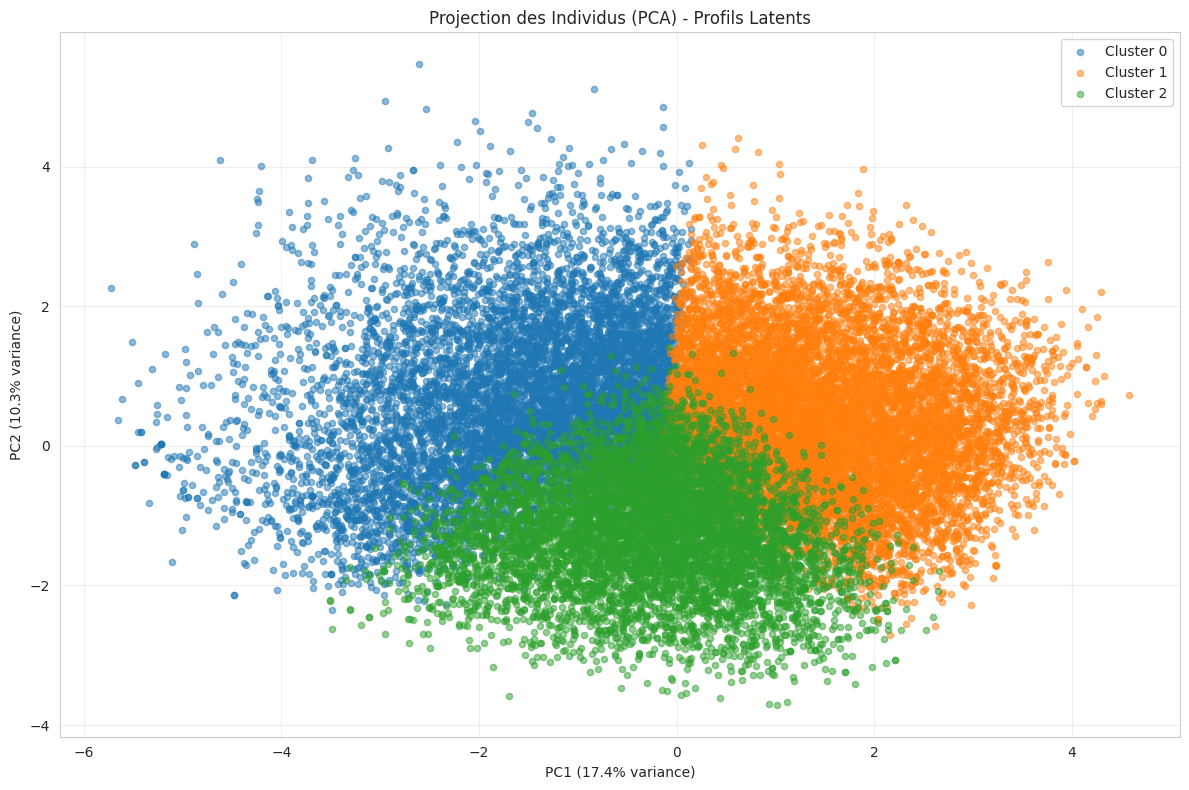

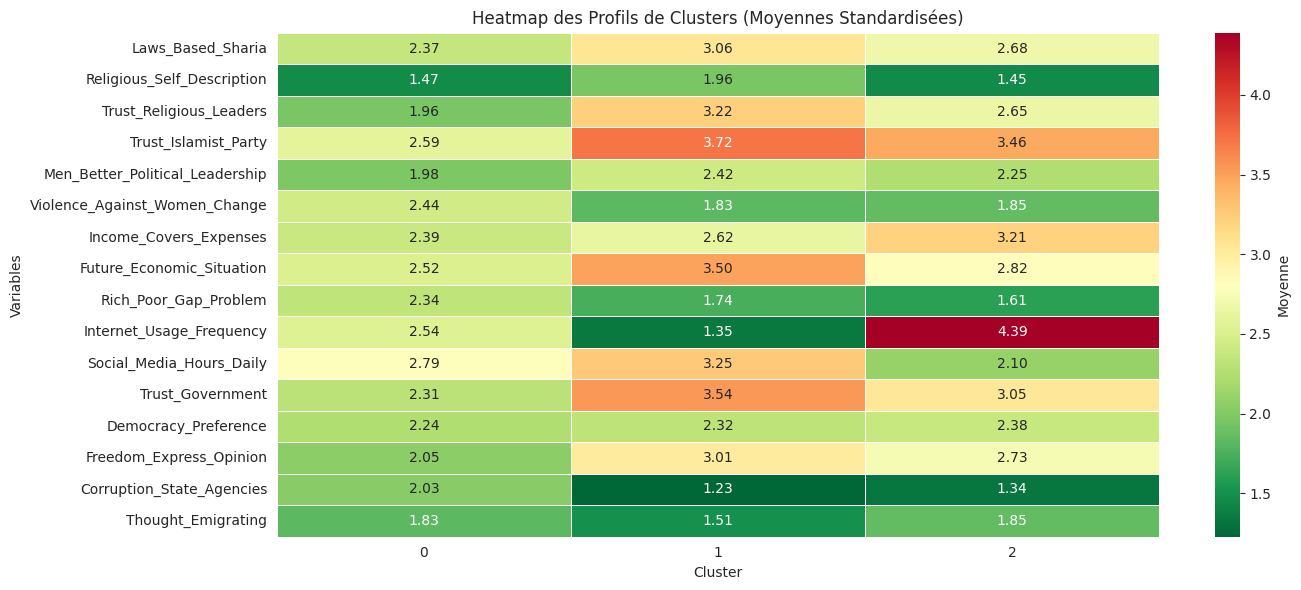

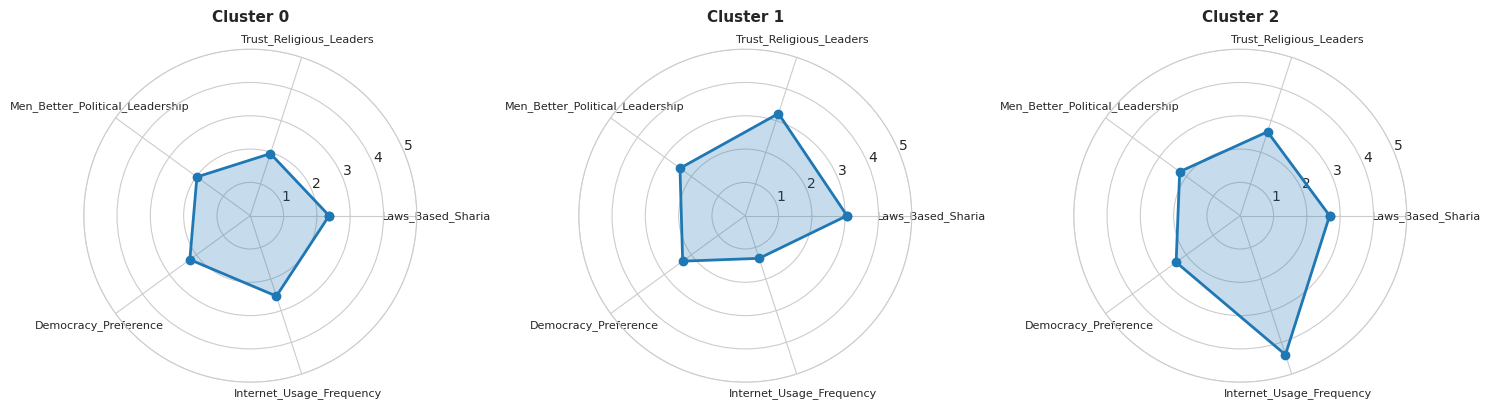

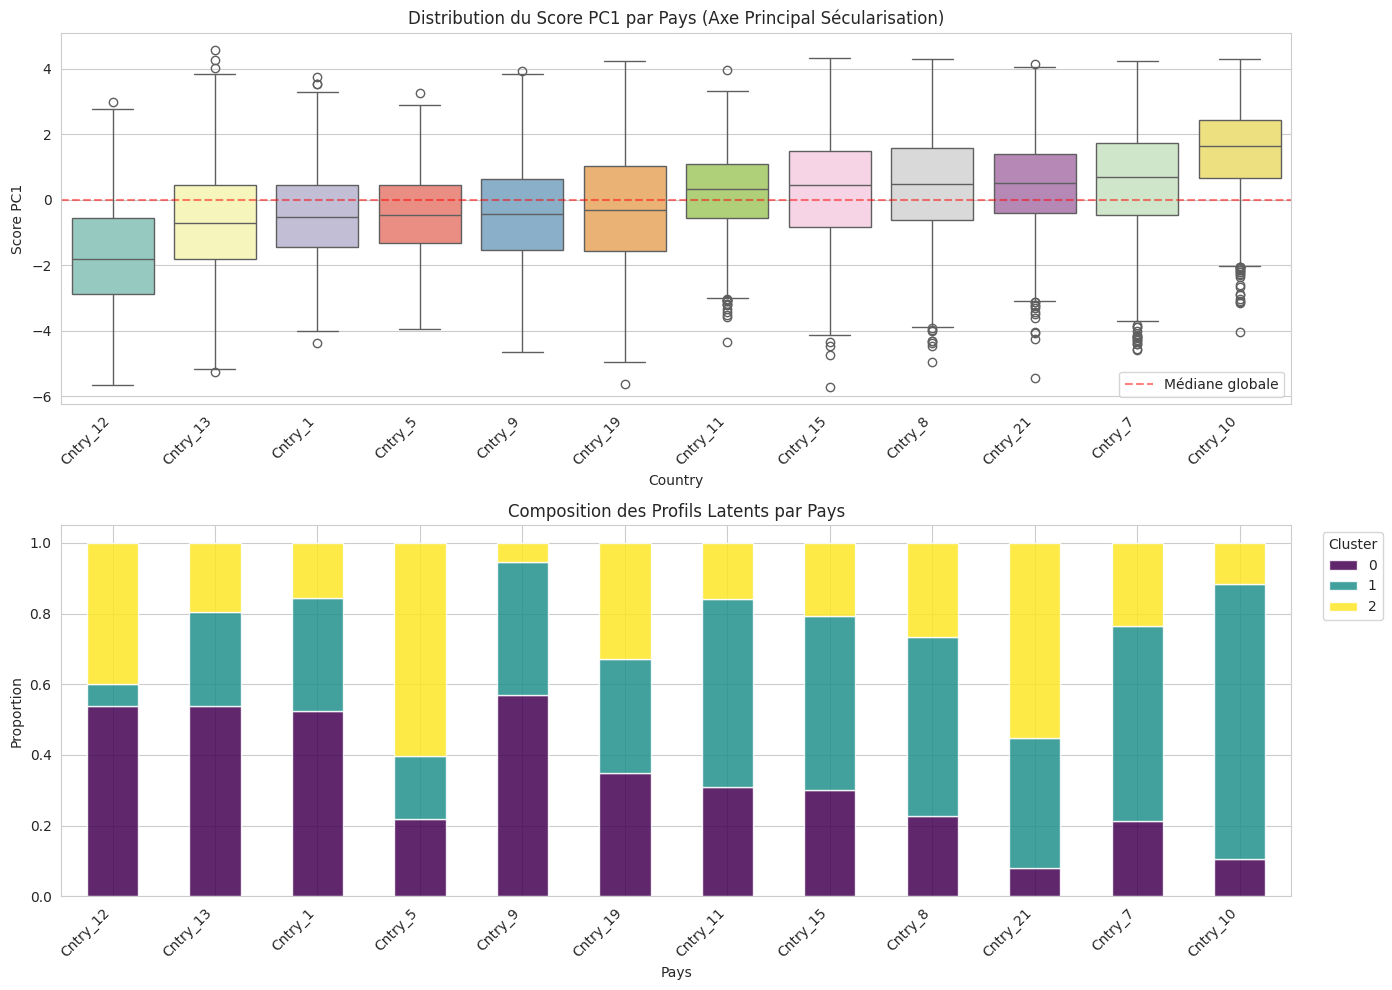


📊 PHASE 5 : TESTS STATISTIQUES D'HYPOTHÈSES

🔬 Tests ANOVA (différences inter-clusters) :
------------------------------------------------------------
Laws_Based_Sharia                        F=723.26, p=0.0000 ***
Religious_Self_Description               F=1953.60, p=0.0000 ***
Trust_Religious_Leaders                  F=4866.91, p=0.0000 ***
Trust_Islamist_Party                     F=5132.92, p=0.0000 ***
Men_Better_Political_Leadership          F=422.62, p=0.0000 ***
Violence_Against_Women_Change            F=1150.24, p=0.0000 ***
Income_Covers_Expenses                   F=1677.65, p=0.0000 ***
Future_Economic_Situation                F=1626.80, p=0.0000 ***

🔬 Tests Chi² (association cluster-démographie) :
------------------------------------------------------------
Gender                                   χ²=189.86, p=0.0000 ***
Education_Level                          χ²=3163.29, p=0.0000 ***
Settlement_Type                          χ²=757.63, p=0.0000 ***

💾 PHASE 6 : EXPORT DES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# =============================================================================
# 1. CHARGEMENT ET PRÉPARATION
# =============================================================================
df = pd.read_csv('/home/chahiri/repos/data_mining_pr/data/df_global_complet.csv')

# Reconstruction Country
country_cols = [c for c in df.columns if 'Cntry_' in c]
df['Country'] = df[country_cols].idxmax(axis=1)

print(f"📊 Données chargées : {len(df):,} observations, {len(country_cols)} pays")
print(f"🌍 Pays : {sorted(df['Country'].unique())}\n")

# =============================================================================
# 2. SÉLECTION DES VARIABLES PAR HYPOTHÈSE
# =============================================================================
# Organisation théorique des variables
hypotheses_vars = {
    'H1_Separation_Religion_Etat': [
        'Laws_Based_Sharia',
        'Trust_Religious_Leaders',
        'Trust_Islamist_Party'
    ],
    'H2_Transformation_Militantisme': [
        # Note: Pas de variables dans votre dataset actuel
        # 'Donate_Money_Charity', 'Volunteer_Work', 'Member_Organization'
    ],
    'H3_Pratique_vs_Identite': [
        'Religious_Self_Description'
        # Manque: 'Pray_Daily_Frequency', 'Pray_Fajr_On_Time'
    ],
    'H4_Inegalites_Genre': [
        'Men_Better_Political_Leadership',
        'Violence_Against_Women_Change'
    ],
    'H5_Securite_Existentielle': [
        'Income_Covers_Expenses',
        'Future_Economic_Situation',
        'Rich_Poor_Gap_Problem',
        'Employment_Status'
    ],
    'H6_Ouverture_Monde': [
        'Internet_Usage_Frequency',
        'Social_Media_Hours_Daily',
        'Thought_Emigrating'
    ],
    'Controles_Politiques': [
        'Trust_Government',
        'Democracy_Preference',
        'Freedom_Express_Opinion',
        'Corruption_State_Agencies'
    ]
}

# Variables d'analyse complète (toutes sauf démographiques)
analysis_vars = [
    'Laws_Based_Sharia', 'Religious_Self_Description',
    'Trust_Religious_Leaders', 'Trust_Islamist_Party',
    'Men_Better_Political_Leadership', 'Violence_Against_Women_Change',
    'Income_Covers_Expenses', 'Future_Economic_Situation', 'Rich_Poor_Gap_Problem',
    'Internet_Usage_Frequency', 'Social_Media_Hours_Daily',
    'Trust_Government', 'Democracy_Preference', 'Freedom_Express_Opinion',
    'Corruption_State_Agencies', 'Thought_Emigrating'
]

# Variables démographiques (pour analyses secondaires)
demo_vars = ['Age', 'Gender', 'Education_Level', 'Settlement_Type', 'Marital_Status', 'Employment_Status']

# Vérifier les valeurs manquantes
print("🔍 Valeurs manquantes par variable :")
missing = df[analysis_vars].isnull().sum()
print(missing[missing > 0])
print()

# Imputation simple (médiane pour éviter de perdre des données)
for var in analysis_vars:
    if df[var].isnull().sum() > 0:
        df[var].fillna(df[var].median(), inplace=True)

# =============================================================================
# 3. ANALYSE EN COMPOSANTES PRINCIPALES (PCA)
# =============================================================================
print("=" * 80)
print("📈 PHASE 1 : ANALYSE EN COMPOSANTES PRINCIPALES (PCA)")
print("=" * 80)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[analysis_vars])

# PCA avec plus de composantes
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X_scaled)

# Variance expliquée
var_explained = pca.explained_variance_ratio_
cumvar_explained = np.cumsum(var_explained)

print(f"\n📊 Variance expliquée par composante :")
for i, (var, cumvar) in enumerate(zip(var_explained, cumvar_explained), 1):
    print(f"  PC{i}: {var*100:.2f}% (cumulé: {cumvar*100:.2f}%)")

# Stocker les scores
df['PC1_Score'] = pca_components[:, 0]
df['PC2_Score'] = pca_components[:, 1]

# Analyse des loadings (interprétation)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, 6)],
    index=analysis_vars
)

print(f"\n🔬 Loadings des 3 premières composantes :")
print(loadings[['PC1', 'PC2', 'PC3']].round(3))

# Visualisation : Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(range(1, 6), var_explained, alpha=0.7, color='steelblue')
axes[0].plot(range(1, 6), cumvar_explained, 'ro-', linewidth=2)
axes[0].set_xlabel('Composante')
axes[0].set_ylabel('Variance expliquée')
axes[0].set_title('Scree Plot - Variance Expliquée')
axes[0].axhline(y=0.7, linestyle='--', color='red', alpha=0.5, label='70%')
axes[0].legend()

# Cercle de corrélation (PC1 vs PC2)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
axes[1].add_artist(circle)
for i, var in enumerate(analysis_vars[:10]):  # Top 10 pour lisibilité
    axes[1].arrow(0, 0, loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'],
                  head_width=0.05, head_length=0.05, fc='darkblue', ec='darkblue', alpha=0.6)
    axes[1].text(loadings.loc[var, 'PC1']*1.15, loadings.loc[var, 'PC2']*1.15, 
                 var.replace('_', '\n'), fontsize=8, ha='center')
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(-1.2, 1.2)
axes[1].set_xlabel(f'PC1 ({var_explained[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({var_explained[1]*100:.1f}%)')
axes[1].set_title('Cercle de Corrélation (Variables)')
axes[1].axhline(0, color='gray', linewidth=0.5)
axes[1].axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.savefig('1_PCA_analysis.png', dpi=150)
plt.show()

# =============================================================================
# 4. DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS
# =============================================================================
print("\n" + "=" * 80)
print("🎯 PHASE 2 : DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS")
print("=" * 80)

# Méthode du coude (Elbow)
inertias = []
silhouettes = []
K_range = range(2, 8)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans_temp.labels_))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Nombre de Clusters (k)')
axes[0].set_ylabel('Inertie (Within-Cluster Sum of Squares)')
axes[0].set_title('Méthode du Coude (Elbow Method)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouettes, 'ro-')
axes[1].set_xlabel('Nombre de Clusters (k)')
axes[1].set_ylabel('Score de Silhouette')
axes[1].set_title('Score de Silhouette par k')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('2_Optimal_Clusters.png', dpi=150)
plt.show()

# Recommandation
optimal_k = 3
print(f"\n✅ Nombre optimal suggéré : k = {optimal_k} (max silhouette)")
print(f"   Silhouette scores : {dict(zip(K_range, np.round(silhouettes, 3)))}")

# =============================================================================
# 5. CLUSTERING FINAL
# =============================================================================
print("\n" + "=" * 80)
print(f"🎭 PHASE 3 : CLUSTERING (k = {optimal_k})")
print("=" * 80)

# K-Means avec k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Centres des clusters (valeurs originales)
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=analysis_vars
)

print(f"\n📊 Distribution des individus par cluster :")
print(df['Cluster'].value_counts().sort_index())
print(f"\nProportions : ")
print((df['Cluster'].value_counts(normalize=True) * 100).sort_index().round(1))

# Statistiques descriptives par cluster
print(f"\n🔬 PROFILS DES CLUSTERS (moyennes) :\n")
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} (n={len(df[df['Cluster']==cluster_id]):,})")
    print(f"{'='*60}")
    subset = df[df['Cluster'] == cluster_id][analysis_vars].mean()
    print(subset.round(2).to_string())

# =============================================================================
# 6. VISUALISATIONS AVANCÉES
# =============================================================================
print("\n" + "=" * 80)
print("📊 PHASE 4 : VISUALISATIONS")
print("=" * 80)

# A. Projection PCA avec clusters
fig, ax = plt.subplots(figsize=(12, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    mask = df['Cluster'] == cluster_id
    ax.scatter(df.loc[mask, 'PC1_Score'], df.loc[mask, 'PC2_Score'],
               label=f'Cluster {cluster_id}', alpha=0.5, s=20)
ax.set_xlabel(f'PC1 ({var_explained[0]*100:.1f}% variance)')
ax.set_ylabel(f'PC2 ({var_explained[1]*100:.1f}% variance)')
ax.set_title('Projection des Individus (PCA) - Profils Latents')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('3_PCA_Clusters_Projection.png', dpi=150)
plt.show()

# B. Heatmap des profils
fig, ax = plt.subplots(figsize=(14, 6))
cluster_profiles = df.groupby('Cluster')[analysis_vars].mean()
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Moyenne'}, linewidths=0.5)
ax.set_title('Heatmap des Profils de Clusters (Moyennes Standardisées)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Variables')
plt.tight_layout()
plt.savefig('4_Heatmap_Clusters.png', dpi=150)
plt.show()

# C. Radar Charts par cluster
from math import pi

def create_radar_chart(data, title, ax):
    categories = list(data.index)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = data.values.tolist()
    values += values[:1]
    angles += angles[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=8)
    ax.set_ylim(0, 5)
    ax.set_title(title, size=11, weight='bold', pad=20)
    ax.grid(True)

# Variables clés pour radar
radar_vars = ['Laws_Based_Sharia', 'Trust_Religious_Leaders', 'Men_Better_Political_Leadership',
              'Democracy_Preference', 'Internet_Usage_Frequency']

fig, axes = plt.subplots(1, optimal_k, figsize=(5*optimal_k, 5), subplot_kw=dict(projection='polar'))
if optimal_k == 1:
    axes = [axes]
for i, ax in enumerate(axes):
    cluster_data = df[df['Cluster'] == i][radar_vars].mean()
    create_radar_chart(cluster_data, f'Cluster {i}', ax)
plt.tight_layout()
plt.savefig('5_Radar_Charts.png', dpi=150)
plt.show()

# D. Distribution par pays
sorted_countries = df.groupby('Country')['PC1_Score'].median().sort_values().index

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Boxplot PC1 par pays
sns.boxplot(data=df, x='Country', y='PC1_Score', order=sorted_countries, 
            palette='Set3', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Distribution du Score PC1 par Pays (Axe Principal Sécularisation)')
axes[0].set_ylabel('Score PC1')
axes[0].axhline(0, linestyle='--', color='red', alpha=0.5, label='Médiane globale')
axes[0].legend()

# Stacked bar clusters par pays
country_cluster = pd.crosstab(df['Country'], df['Cluster'], normalize='index')
country_cluster = country_cluster.loc[sorted_countries]
country_cluster.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis', alpha=0.85)
axes[1].set_title('Composition des Profils Latents par Pays')
axes[1].set_xlabel('Pays')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('6_Distribution_Pays.png', dpi=150)
plt.show()

# =============================================================================
# 7. TESTS STATISTIQUES
# =============================================================================
print("\n" + "=" * 80)
print("📊 PHASE 5 : TESTS STATISTIQUES D'HYPOTHÈSES")
print("=" * 80)

# Test ANOVA : différences entre clusters
print("\n🔬 Tests ANOVA (différences inter-clusters) :")
print("-" * 60)
for var in analysis_vars[:8]:  # Top 8 variables
    groups = [df[df['Cluster'] == c][var].values for c in sorted(df['Cluster'].unique())]
    f_stat, p_value = f_oneway(*groups)
    sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"{var:40s} F={f_stat:6.2f}, p={p_value:.4f} {sig}")

# Tests Chi² pour variables catégorielles
print("\n🔬 Tests Chi² (association cluster-démographie) :")
print("-" * 60)
for var in ['Gender', 'Education_Level', 'Settlement_Type']:
    if var in df.columns:
        contingency = pd.crosstab(df['Cluster'], df[var])
        chi2, p_value, dof, expected = chi2_contingency(contingency)
        sig = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        print(f"{var:40s} χ²={chi2:6.2f}, p={p_value:.4f} {sig}")

# =============================================================================
# 8. EXPORT DES RÉSULTATS
# =============================================================================
print("\n" + "=" * 80)
print("💾 PHASE 6 : EXPORT DES RÉSULTATS")
print("=" * 80)

# Statistiques par pays
country_stats = df.groupby('Country').agg({
    'PC1_Score': ['mean', 'median', 'std'],
    'Laws_Based_Sharia': 'mean',
    'Trust_Religious_Leaders': 'mean',
    'Men_Better_Political_Leadership': 'mean',
    'Internet_Usage_Frequency': 'mean',
    'Cluster': lambda x: x.value_counts().to_dict()
})
country_stats.to_csv('resultats_par_pays.csv')
print("✅ Fichier créé : resultats_par_pays.csv")

# Profils détaillés
cluster_profiles_full = df.groupby('Cluster')[analysis_vars + demo_vars].mean()
cluster_profiles_full.to_csv('profils_clusters_detailles.csv')
print("✅ Fichier créé : profils_clusters_detailles.csv")

# Dataset enrichi
df[['Country', 'Cluster', 'PC1_Score', 'PC2_Score'] + demo_vars].to_csv('dataset_avec_clusters.csv', index=False)
print("✅ Fichier créé : dataset_avec_clusters.csv")

print("\n" + "=" * 80)
print("✨ ANALYSE TERMINÉE - RÉSUMÉ")
print("=" * 80)
print(f"📊 {len(df):,} individus analysés sur {len(country_cols)} pays")
print(f"🎯 {optimal_k} profils latents identifiés")
print(f"📈 {cumvar_explained[1]*100:.1f}% de variance expliquée (2 premières composantes)")
print(f"📁 6 graphiques et 3 fichiers CSV générés")
print("\n🎓 Prochaines étapes suggérées :")
print("   1. Identifier les pays (Cntry_X) avec métadonnées")
print("   2. Régression logistique : prédire Cluster ~ Age + Education + Internet")
print("   3. Analyse temporelle si données longitudinales disponibles")
print("=" * 80)